<a href="https://colab.research.google.com/github/jiin-son/credit_card_fraud_detection/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Selection

To avoid 1) overfitting, 2) improve the model performance, and 3) reduce the rumtime, feature selection before modelling is necessary. 

### 1. Load Package, Definition, and Data
#### 1.1. Load Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

#### 1.2. Load Data

In [2]:
# Choose the file from directory
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 2. Logistic Regression
Run logistic Regression without feature selection (for comparison purposes)

In [4]:
# Store column names only for input vaiables excluding target variable ('Class')
cols = [col for col in df.columns if col != 'Class']

# Split the dataset
X = df[cols]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [5]:
# run logistic regression using all the variables
log_reg= LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


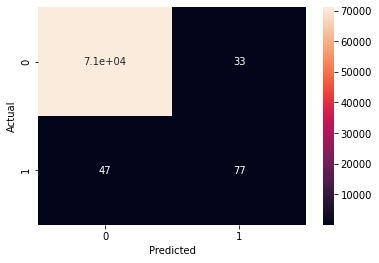

In [6]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [18]:
# get the accuracy, f1 score, precision, recall, and area under the roc curve
print("accuracy_score :", "{:.2%}".format(accuracy_score(y_test, y_pred)))
print("f1_score :", "{:.2%}".format(f1_score(y_test, y_pred)))
print("precison_score (=tpr=sensitivity):", "{:.2%}".format(precision_score(y_test, y_pred)))
print("recall_score :", "{:.2%}".format(recall_score(y_test, y_pred)))
print("roc_auc_score :", "{:.2%}".format(roc_auc_score(y_test, y_pred)))


accuracy_score : 99.89%
f1_score : 65.81%
precison_score (=tpr=sensitivity): 70.00%
recall_score : 62.10%
roc_auc_score : 81.03%


accuracy matrix not reliable due to highly unbalance data. how to evaluate fpr/fnr?

### 3. Feature Selection
#### 3.1. Random Forest

In [19]:
# Store column names only for input vaiables excluding target variable ('Class')
cols = [col for col in df.columns if col != 'Class']

# Split the dataset
X = df[cols]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [21]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [23]:
# get the accuracy, f1 score, precision, recall, and area under the roc curve
print("accuracy_score :", "{:.2%}".format(accuracy_score(y_test, y_pred)))
print("f1_score :", "{:.2%}".format(f1_score(y_test, y_pred)))
print("precison_score (=tpr=sensitivity):", "{:.2%}".format(precision_score(y_test, y_pred)))
print("recall_score :", "{:.2%}".format(recall_score(y_test, y_pred)))
print("roc_auc_score :", "{:.2%}".format(roc_auc_score(y_test, y_pred)))

ValueError: ignored

In [24]:
rf.feature_importances_

array([0.01473441, 0.00997568, 0.00238902, 0.00593383, 0.01863005,
       0.00445633, 0.00774097, 0.01758045, 0.00614618, 0.00427952,
       0.05898657, 0.00882743, 0.06965941, 0.0126074 , 0.09312   ,
       0.01285205, 0.01294818, 0.51516835, 0.00648214, 0.01237432,
       0.00890674, 0.01129955, 0.00733955, 0.00538885, 0.00523978,
       0.00600756, 0.02875661, 0.01530741, 0.00735955, 0.00950209])

Text(0.5, 0, 'Random Forest Feature Importance')

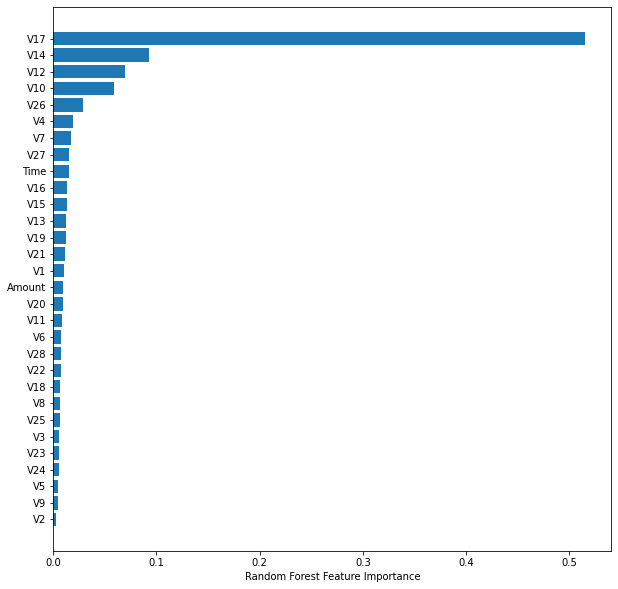

In [25]:
sorted_idx = rf.feature_importances_.argsort() # sort the feature importance array
plt.figure(figsize=(10,10))
plt.barh(df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [35]:
# Column names only for top5 from random forest feature importance
feature_selection = ['V17', 'V14', 'V12', 'V10', 'V26', 'V4']

# Split the dataset
X = df[feature_selection]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

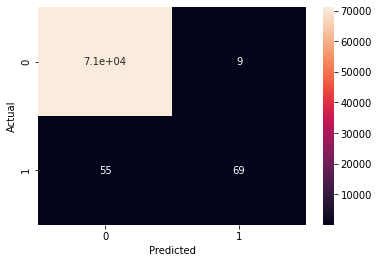

In [36]:
# run logistic regression using all the variables
log_reg= LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [37]:
# get the accuracy, f1 score, precision, recall, and area under the roc curve
print("accuracy_score :", "{:.2%}".format(accuracy_score(y_test, y_pred)))
print("f1_score :", "{:.2%}".format(f1_score(y_test, y_pred)))
print("precison_score (=tpr=sensitivity):", "{:.2%}".format(precision_score(y_test, y_pred)))
print("recall_score :", "{:.2%}".format(recall_score(y_test, y_pred)))
print("roc_auc_score :", "{:.2%}".format(roc_auc_score(y_test, y_pred))) # how to generate roc curve?

accuracy_score : 99.91%
f1_score : 68.32%
precison_score (=tpr=sensitivity): 88.46%
recall_score : 55.65%
roc_auc_score : 77.82%


In [30]:
# Store column names only for input vaiables excluding target variable ('Class')
cols = [col for col in df.columns if col != 'Class']

# Split the dataset
X = df[cols]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Optimal number of features: 17


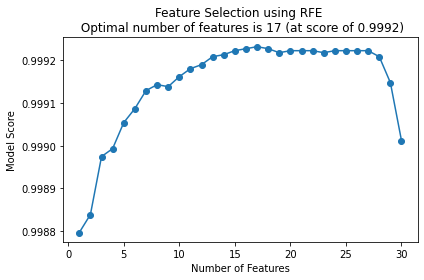

In [31]:
from sklearn.feature_selection import RFECV

lg = LogisticRegression(random_state = 42) 
feature_selector = RFECV(lg)

fit = feature_selector.fit(X_train,y_train)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

df_X_train = pd.DataFrame(X_train)
df_X_train = df_X_train.loc[:, feature_selector.get_support()] # Get a mask, or integer index, of the features selected

df_X_test  = pd.DataFrame(X_test)
df_X_test  = df_X_test.loc[:, feature_selector.get_support()]

plt.plot(range(1,len(fit.grid_scores_) + 1), fit.grid_scores_, marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.grid_scores_),4)})" )
plt.tight_layout()
plt.show()

In [ ]:
# get the accuracy, f1 score, precision, recall, and area under the roc curve
print("accuracy_score :", "{:.2%}".format(accuracy_score(y_test, y_pred)))
print("f1_score :", "{:.2%}".format(f1_score(y_test, y_pred)))
print("precison_score (=tpr=sensitivity):", "{:.2%}".format(precision_score(y_test, y_pred)))
print("recall_score :", "{:.2%}".format(recall_score(y_test, y_pred)))
print("roc_auc_score :", "{:.2%}".format(roc_auc_score(y_test, y_pred))) # how to generate roc curve?

### 3. Export the Dataset